# Линейная регрессия

## Лабораторная работа №2


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Шатаров Кирилл Александрович

Группа: 211-365

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/linreg-1.csv
1. http://labcolor.space/linreg-2.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

In [2]:
# Из соответствующего модуля библиотеки sklearn импортируйте класс нужной модели

from sklearn.linear_model import LinearRegression

## Чтение данных и краткий анализ

In [3]:
# Используя метод read_csv() из Pandas считайте данные для вашего варианта.

df = pd.read_csv('http://labcolor.space/linreg-1.csv')

In [4]:
df.shape

(50, 2)

In [5]:
df.head()

,X,y
0,15.374756,24.394275
1,0.780478,3.333808
2,20.828226,35.224102
3,22.883040,37.235602
4,32.212915,50.746781


In [6]:
df.describe()

,X,y
count,50.000000,50.000000
mean,15.970735,30.363804
std,8.403019,23.541054
min,0.362969,2.698014
25%,10.251188,18.915306
50%,15.892694,25.987420
75%,21.026480,35.029801
max,34.670504,113.693596


**Сколько объектов есть в вашем наборе данных?**

Ответ: 50

**Сколько и каких признаков у ваших объектов?**

Ответ: 2 признака: целевой признак - y, факторный признак - x.

## Проверка на отсутствующие значения

Используя метод isnull() датафрейма (df) проверьте есть ли отсутствующие значения в ваших данных.

In [7]:
df.isnull().sum()

X    0
y    0
dtype: int64

Если в вашем наборе данных есть пропуски, то удалите эти образцы используя метод dropna().

In [8]:
df.dropna()

,X,y
0,15.374756,24.394275
1,0.780478,3.333808
2,20.828226,35.224102
3,22.883040,37.235602
4,32.212915,50.746781
5,20.177660,34.244630
6,24.906913,41.914661
7,4.693302,10.437777
8,19.771751,32.949805
9,12.939412,22.000203


In [9]:
df.shape

(50, 2)

**Сколько объектов было удалено?**

Ответ: 0

Используя метод pop() разделите ваши зависимые и независимые переменные - X, y

In [10]:
y = df.pop('y')
X = df

Далее используя метод train_test_split() разделите данные на обучающую и проверочную части. В тестовую часть выделите 20% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение без обработки

In [12]:
# Создайте объект модели линейной регрессии
regr = LinearRegression()

# Обучите модель с использованием обучающего набора
regr.fit(X_train, y_train)

# Сделайте прогноз используя полученную модель
y_pred = regr.predict(X_test)

In [13]:
print('параметр a:', regr.intercept_)
print('параметр b:', regr.coef_)

параметр a: -7.822351052328671
параметр b: [2.43516899]


**Сколько параметров в вашей модели линейной регрессии?**

Ответ: 2 параметра (a и b).

Сравните спрогнозированные значения с тестовыми с помощью средней квадратичной ошибки и коэффициент детерминации.

In [14]:
# В функции требуется передать нужные данные

print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")

Средняя квадратичная ошибка 27.36
Коэффициент детерминации 0.57


Визуализация результатов.

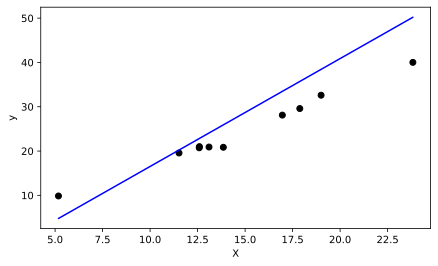

In [15]:
plt.figure(figsize=(7, 4))
plt.scatter(X_test, y_test, color="black")
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_test, y_pred, color="blue")

## Удаление выбросов

Для удаления выбросов воспользуемся z-оценкой.

$z_i = \frac{x_i - \mu}{\sigma}$, где

$\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [16]:
# Используя метод read_csv() из Pandas повторно считайте данные для вашего варианта.

df_2 = pd.read_csv('http://labcolor.space/linreg-1.csv')

<Axes: >

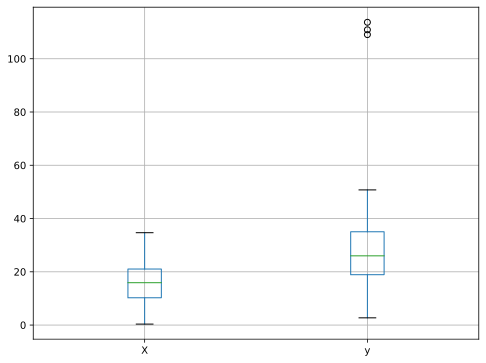

In [17]:
plt.figure(figsize=(8, 6))
df_2.boxplot(column=['X', 'y'])

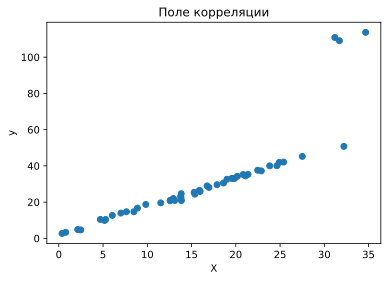

In [18]:
plt.figure(figsize=(6, 4))
plt.title('Поле корреляции')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(df_2['X'], df_2['y'])

С помощью np.mean() и np.std() рассчитайте $\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [19]:
mean = np.mean(df_2['y'])
std = np.std(df_2['y'])

In [20]:
print('mean:', mean)
print('std:', std)

mean: 30.363804399017383
std: 23.304454563852627


Добавляем к нашим данным новую колонку z-score.

In [21]:
df_2["z-score"] = df_2.apply(lambda y: (y['y'] - mean) / std, axis=1)

**Опишите что такое lambda в python**

Ответ: В Python лямбда-выражение позволяет создавать анонимные функции - функции, которые не привязаны к имени. В анонимной функции: может содержаться только одно выражение могут передаваться сколько угодно аргументов.

Если z-оценка больше +3 или меньше -3, то данное значение считаем выбросом и удаляем его из наших данных.

In [22]:
df_2 = df_2.loc[(df_2['z-score'] <= 3) & (df_2['z-score'] >= -3)]

In [23]:
df_2.shape

(47, 3)

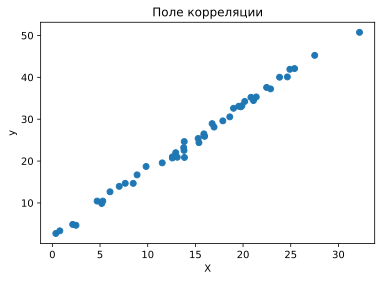

In [24]:
plt.figure(figsize=(6, 4))
plt.title('Поле корреляции')
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(df_2['X'], df_2['y'])

**В чем заключается идея z-оценки и что подразумевает диапазон от -3 до 3?**

Ответ: z-оценка показывает, на сколько стандартных отклонений значение отличается от среднего значения.
Если z-оценка входит в диапазон от -3 до 3 то данное значение не является выбросом.

**Сколько значений было удалено как выбросы?**

Ответ: 3

## Обучение после обработки

In [25]:
df_2.drop('z-score', axis= 1 , inplace= True)

In [26]:
df_2.shape

(47, 2)

In [27]:
y = df_2.pop('y')
X = df_2

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Создайте объект модели линейной регрессии
regr_2 = LinearRegression()

# Обучите модель с использованием обучающего набора
regr_2.fit(X_train, y_train)

# Сделайте прогноз используя полученную модель
y_pred = regr_2.predict(X_test)

In [30]:
print('параметр a:', regr_2.intercept_)
print('параметр b:', regr_2.coef_)

параметр a: 1.727812176588749
параметр b: [1.57597494]


Как и в разделе обучение без обработки оцените модель регрессии по средней квадратичной ошибке и коэффициенту детерминации.

In [31]:
print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")

Средняя квадратичная ошибка 1.91
Коэффициент детерминации 0.98


Визуализируйте результат.

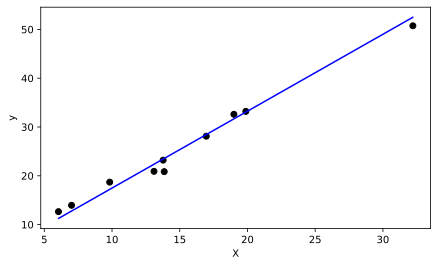

In [32]:
# визуализация
plt.figure(figsize=(7, 4))
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")

Сравните результаты до работы с выбросами и после.

**Как изменились результаты работы модели после удаления выбросов?**

После удаления выбросов улучшилось качество и точность модели. Изначально коэффициент детерминации равнялся 0.57, а после удаления выбросов 0.98, это говорит о том, что уравнение регрессии объясняет 98% дисперсии результативного признака y, а на долю прочих неучтённых в модели факторов приходится лишь 2%. Значение средней квадратичной ошибки уменьшилось с 27.36 до 1.91, что также свидетельствует об улучшении качества и точности модели.

**Опишите идею метода наименьших квадратов.**

МНК позволяет получить такие оценки параметров a и b, при которых сумма квадратов отклонений  фактического значения результативного признака y от теоретического (прогнозного) y минимальна.